# **Normal distribution**
The normal distribution is a bell-shaped distribution of data, which is called the '**Gaussian bell**', this distribution needs two data, which are usually the population '**mu(population mean)**' and '**sigma(population variance)**', in turn **if these are not population data, the use of the 't-student' test is recommended, as the larger the data becomes more similar to a normal distribution.**

---

As an example, we have a country where the mean height is 1.75cm, thus the mean **mu = 1.75** and the data are separated by 0.12cm, so the deviation **sigma = 0.12**. For this example it is necessary to use the **norm** class of the **stats** module.

In [57]:
from scipy.stats import norm
from statistics import mean, stdev

mu = 170
sigma = 12
normal = norm(mu, sigma)

# Modal
The normal distribution has several modals, which are:

- Unimodal, has a single peak.
- Bimodal, has two peaks.
- Multimodal, has three or more peaks.
- Uniform, it does not have peaks, the data is all the same size.

## Unimodal

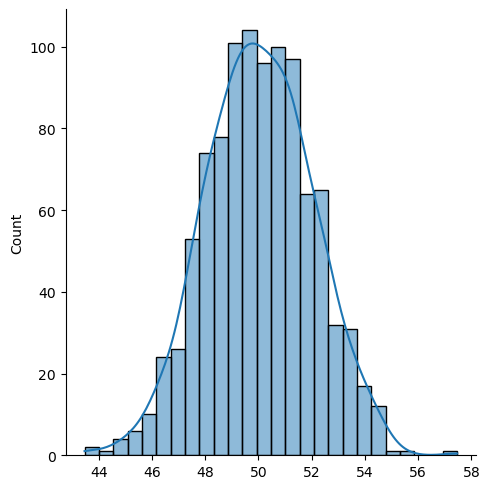

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sn

data = sp.norm.rvs(loc=50, scale=2, size=1000)

sn.displot(data, kde=True, kind='hist')
plt.show()

## Bimodal

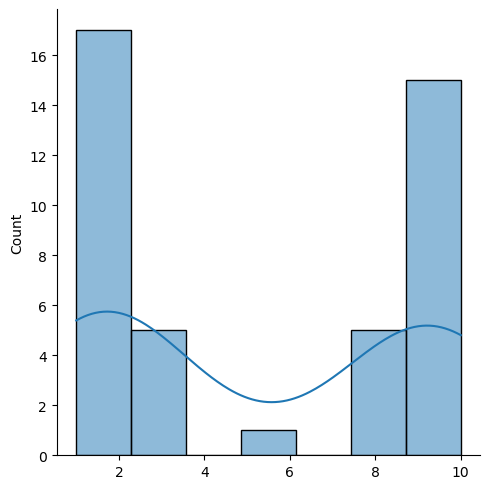

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sn

data = np.array([1,1,1,1,1,1,1,1,1,1,1,
                 2,2,2,2,2,2,3,3,3,3,3,
                 5,
                 8,8,8,8,8,
                 9,9,9,9,9,9,
                 10,10,10,10,10,10,10,10,10])

sn.displot(data, kde=True, kind='hist')
plt.show()

## Multimodal

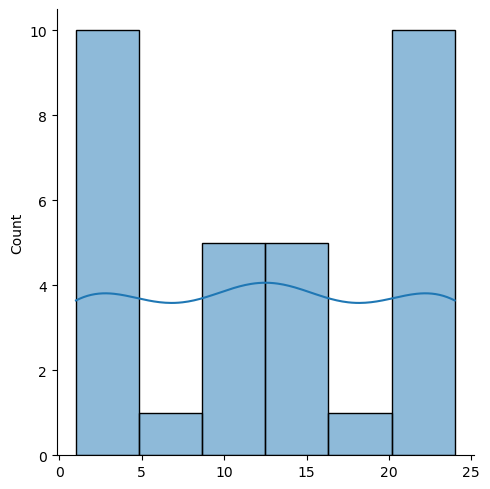

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sn

data = [
    1,1,1,1,1,
    2,2,2,2,2,
    7,
    12,12,12,12,12,
    13,13,13,13,13,
    18,
    23,23,23,23,23,
    24,24,24,24,24
]

sn.displot(data, kde=True, kind='hist')
plt.show()

## Uniforme

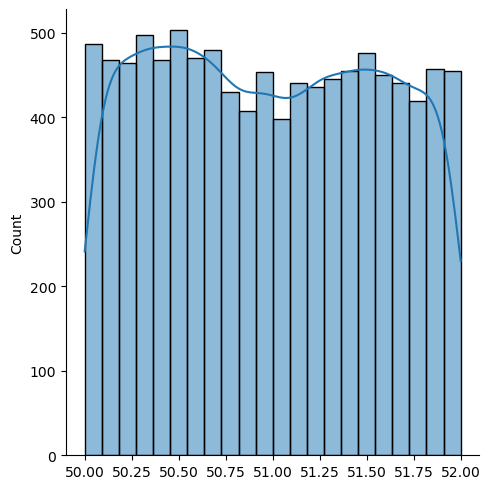

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sn

data = sp.uniform.rvs(loc=50, scale=2, size=10000)

sn.displot(data, kde=True, kind='hist')
plt.show()

# z-score(z-scores)
Z-score is simply the difference of the data compared to the mean in terms of standard deviations, in other words how many standard deviations the data is away from the mean. This is the basic composition of the normal distribution.

In [62]:
import scipy.stats as sp

sample= sorted(sp.norm.rvs(size= 2000,  loc= 170, scale= 80))

z= sp.zscore(sample)
z

array([-2.91388039, -2.8089033 , -2.75889315, ...,  2.80503578,
        2.99087395,  3.2394715 ])

# **68-95-99.7 Rule**

Said rule refers to the fact that 68% of the distribution must be within the first standard deviation, 95% must be within the second standard deviation, and 99.7% must be within the third standard deviation. All this in the following way:
$$ \text{standard deviation} ≤ 68\% $$
$$ 2 * \text{standard deviation} ≤ 95\% $$
$$ 3 * \text{standard deviation} ≤ 99.7\% $$

## First standard deviations

In [63]:
z[(z <= 3) & (z >= -3)]

array([-2.91388039, -2.8089033 , -2.75889315, ...,  2.71218808,
        2.80503578,  2.99087395])

## Outliers

In [64]:
z[z < -3]

array([], dtype=float64)

In [65]:
z[ z > 3]

array([3.2394715])

# Gaussian bell
The normal distribution uses the Gaussian function, which was designed by the mathematician **Johann Carl Friedrich Gauss**, this function has the form:

$$f(x) = ae^{-\frac{(x-b)^2}{2c^2}}$$

And it is due to this function that we have the bell shape of the distribution.

## **Shape**

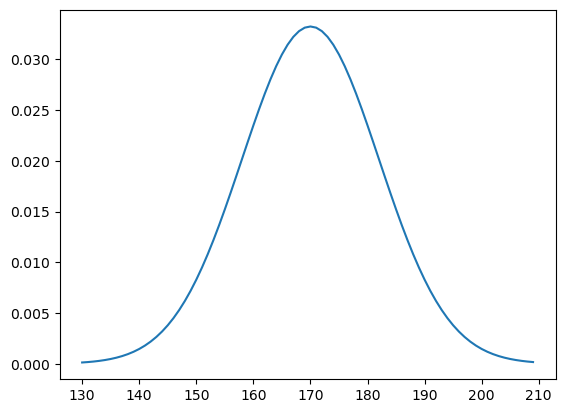

In [66]:
import matplotlib.pyplot as plt

x = range(130, 210, 1)

plt.plot(x, normal.pdf(x))
plt.show()

## Sample
Every Gaussian bell must be structured by data, which must be sought before each experiment.

### **rvs(scipy)**
The **rvs** method of the **norm** class has the purpose of generating random samples, in this way the parameters **size(sample size)**, **loc(mean)** are used , **scale(standard deviation)** and the parameter **random_state(seed to generate random numbers).**

In [67]:
randnorm = norm.rvs(size=100, loc=70, scale=10)
print(len(randnorm))
print('Mean', mean(randnorm))
print('Standard deviation', stdev(randnorm))

100
Mean 69.26450925440078
Standard deviation 9.567013316800466


### **fit(scipy)**
The **fit** method is used to fit a data series to a model, this method results in the standard deviation and the mean.

In [68]:
rand = norm.rvs(loc=100, scale=12, size=1000)
mean, deviation = norm.fit(rand)
print('mean', mean)
print('deviation', deviation)

mean 99.96792058871704
deviation 11.998626685939886


## Probability density function
Once the bell figure is obtained, it is possible to find the probability within it and below it.

### **pdf(scipy)**
The **pdf(probability density function)** method shows the exact position of the curve in the indicated number, in a better way it indicates the value of the indicated number within the Gaussian function having as a maximum the value of the mean **mu* *, here the dento value of the Gaussian function is obtained through the derivative.

It is the exact probability of getting a singular value within the distribution, such as the probability of getting 169, 170, or 171.

In [69]:
print(normal.pdf(169))
print(normal.pdf(170))
print(normal.pdf(171))

0.0331299555215285
0.03324519003345273
0.0331299555215285


## Area inside the curve
Once the curve is obtained, it is possible to obtain the area within it, which is the integral within the curve, this is the probability that a certain event will happen.

### **cdf(scipy)**
On the other hand, the **cdf(cumulative distribution function)** shows the cumulative density inside the curve, which means the associated probability of the minimum point 0 up to the point indicated in the function. In this way, the **cdf function shows the accumulated from 0 to point 169 and from point 0 to 171**, by subtracting these two we have the accumulated between 169 and 171. To obtain this result it is necessary to integrate within the bell de gauss.

In [70]:
lower = normal.cdf(169)
higher = normal.cdf(171)
print(lower)
print(higher)
print(lower-higher)

0.4667932481473777
0.5332067518526223
-0.06641350370524463


### **sf(scipy)**
The **sf(survival function)** method is the complement of the **cdf(cumulative distribution function)**, that is, it is equal to cdf -1, in this way, when adding both, 1 is obtained because it is the ** cdf(cumulative distribution function)** plus its complement.

In [71]:
cumulative = normal.cdf(171)
survival = normal.sf(171)
total = cumulative + survival
print(total)

1.0


### **ppf(scipy)**
The **ppf(precent point function)** method is the inverse of the **cdf(cumulative distribution function)** method, so it takes a percentage and returns the numerical representation. For example the **cdf(cumulative distribution function)** of 171 is 0.5332067518526223 and the **ppf(percent point function)** of 0.5332067518526223 is 171.

In [72]:
print('cdf', normal.cdf(171))
print('ppf', normal.ppf(0.5332067518526223))

cdf 0.5332067518526223
ppf 171.0


### **isf(scipy)**
The **isf(inverse survival function)** method is the inverse method of **sf(survival function)**, so the **sf(survival function)** of 171 is 0.4667932481473777 and the **isf( inverse survival function)** of 0.4667932481473777 is 171.

In [73]:
print(normal.sf(171))
print(normal.isf(0.4667932481473777))

0.4667932481473777
171.0


### **interval(scipy)**
The **interval** method is intended to indicate a mean interval within the Gaussian bell, such as the 95% of the initial sample in which the mean **mu** is 1.70cm tall and The standard deviation **sigma** is 0.12cm and is an interval of **between 146.48043218551936 and 193.51956781448064**. This method is ideal for two-tailed analysis, which is the most recommended in hypothesis testing, since one-tailed analyzes usually present problems due to the lack of the probability that the event will not happen.

In [74]:
interval = normal.interval(0.95)
print(interval)

(146.48043218551936, 193.51956781448064)


# **COMPLETE!!**

In [75]:
print(normal.moment(1))

170.0


In [76]:
print(normal.moment(2))

29044.0


In [77]:
print(normal.moment(3))

4986440.0


In [78]:
print(normal.moment(4))

860241808.0


## Statistics
All distributions have statistics which are descriptive statistics, such as the mean, variance, bias and kutosis.

### **stats(scipy)**
The **stats** method using the **moments** parameter returns the mean**(mean)**, the variance**(variance)**, the skew**(skew)** and the kurtosis** (kurtosis)**.

In [79]:
mean, variance, skew, kurtosis = normal.stats(moments='mvsk')
print('mean', mean)
print('variance', variance)
print('skew', skew)
print('kutosis', kurtosis)

mean 170.0
variance 144.0
skew 0.0
kutosis 0.0


# **COMPLETE!!**

In [80]:
print(normal.entropy())

3.903845182992673


# **COMPLETE!!**

In [81]:
norm.expect()

-1.3877787807814457e-17

## Statistics one by one

### median(scipy)
The **median** method returns the median of the data.

In [82]:
print(normal.median())

170.0


### **mean(scipy)**
The **mean** method returns the mean of the data.

In [83]:
print(normal.mean())

170.0


### **var(scipy)**
The **var** method returns the variance of the data.

In [84]:
print(normal.var())

144.0


### **std(scipy)**
The **std** method returns the standard deviation of the data.

In [85]:
print(normal.std())

12.0


# Normal distribution applied to a population
In case of having data from an entire population, it is possible to have total control of the data so that it is not necessary to make any transformation and if you want to test hypotheses, it is only necessary to use the empirical knowledge behind the tests.

# Normal distribution applied to a sample
When taking a sample to make a normal distribution, it is necessary to make transformations, take into account certain conditions and establish certain inferences to determine the reliability of the sample and perform hypothesis tests.

## Conditions for samples
At this point it is possible to mention that a normal distribution can be used for both the population and samples, in case of using the normal distribution for a sample it is necessary to have certain conditions which must be used for each of the following procedures, These conditions are in different ways depending on the type of data you have.

### Conditions for categorical data

- Assumption of independence: the sampled values must be independent of each other.

- Randomization condition: the data must be representative of the population and selected at random.

- 10% Condition: the sample size, n, must not be greater than 10% of the population.

- Success/Failure: np≥10 and nq≥10

### Conditions for numeric data
- Assumption of independence: the sampled values must be independent of each other.

- Randomization condition: the data must be representative of the population and selected at random.

- 10% Condition: the sample size, n, must not be greater than 10% of the population.

- Almost Normal Condition: The data come from a distribution that is unimodal and symmetric. This can be checked by making a histogram. Student's t-models will not work with highly skewed data.

# Central Limit Theorem
It is possible to convert any distribution into a normal distribution, using the central limit theorem, this is achieved by taking samples within the original distribution and forming a new distribution using the means of the samples. The logic behind is to search for the "absolute mean" within the data.

## Demonstration
The uniform distribution is a symmetric distribution that has data that fall in similar ranges. Thus, we have a total sample of 2000.

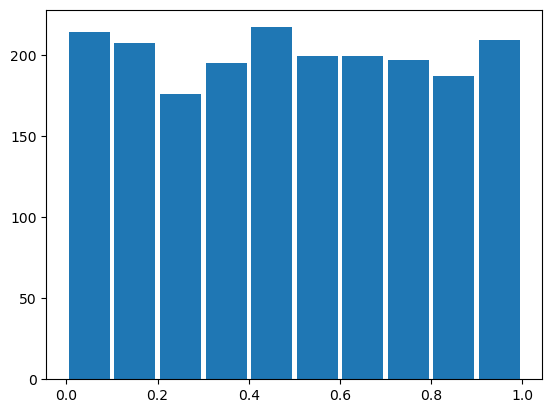

In [86]:
size = 2000

import matplotlib.pyplot as plt
from scipy.stats import uniform

uDist= uniform.rvs(size= size, random_state= 45)

plt.hist(uDist, rwidth=0.9)
plt.show()

In [87]:
# Descriptions

import scipy.stats as st

def stats(clt1, clt2, clt3, clt4):

  print(f'''
  30 samples - mean {st.describe(clt1)[2]}
  30 samples - sterror {math.sqrt(st.describe(clt1)[3])}
  30 samples - skew {st.describe(clt1)[4]}
  30 samples - kurt {st.describe(clt1)[5]}
''')
  print(f'''
  60 samples - mean {st.describe(clt2)[2]}
  60 samples - sterror {math.sqrt(st.describe(clt2)[3])}
  60 samples - skew {st.describe(clt2)[4]}
  60 samples - kurt {st.describe(clt2)[5]}
''')
  print(f'''
  90 samples - mean {st.describe(clt3)[2]}
  90 samples - sterror {math.sqrt(st.describe(clt3)[3])}
  90 samples - skew {st.describe(clt3)[4]}
  90 samples - kurt {st.describe(clt3)[5]}
''')
  print(f'''
  1000 samples - mean {st.describe(clt4)[2]}
  1000 samples - sterror {math.sqrt(st.describe(clt4)[3])}
  1000 samples - skew {st.describe(clt4)[4]}
  1000 samples - kurt {st.describe(clt4)[5]}
''')

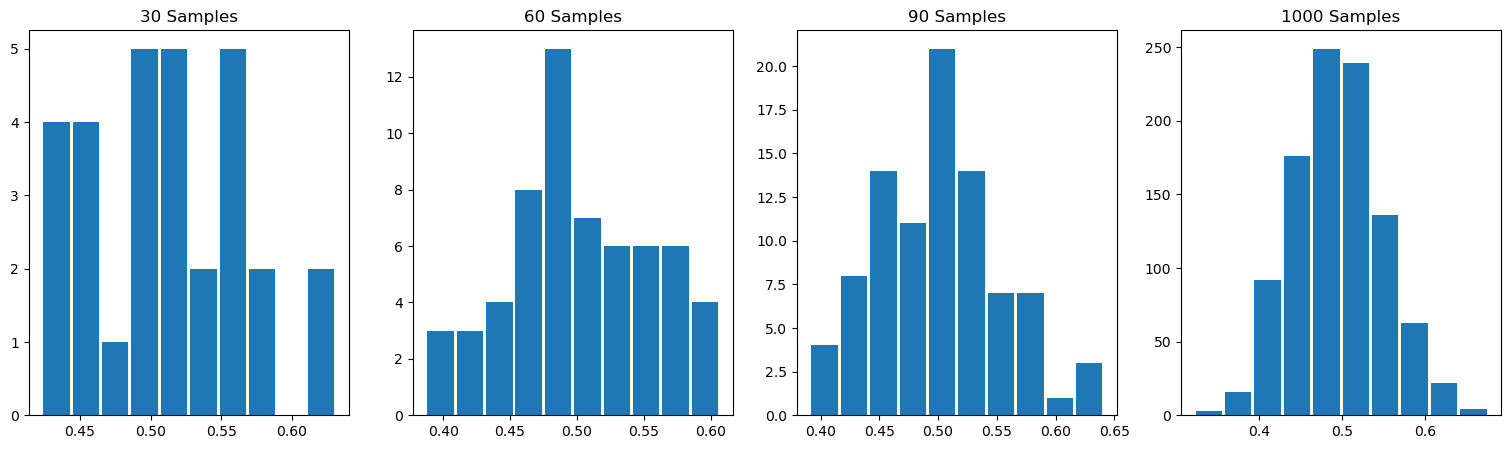


  30 samples - mean 0.5094674344517693
  30 samples - sterror 0.05425763618047274
  30 samples - skew 0.2619855173283454
  30 samples - kurt -0.5145094073670364


  60 samples - mean 0.50132061682063
  60 samples - sterror 0.05488602687381553
  60 samples - skew -0.07944572964973882
  60 samples - kurt -0.5150482264581466


  90 samples - mean 0.5015219746883851
  90 samples - sterror 0.05309533611801017
  90 samples - skew 0.3024765347491767
  90 samples - kurt -0.09918812983385594


  1000 samples - mean 0.4946134830519529
  1000 samples - sterror 0.0540933145213177
  1000 samples - skew 0.17483148198126353
  1000 samples - kurt -0.06748978785284487



In [88]:
# Central limit theorem modifying only the number of samples.
# By modifying only the number of samples, the distributions become normal but the optimum case is not obtained.

import matplotlib.pyplot as plt
import math
import random
import statistics

def get_sample(dist, s, q):
  
  means = []

  for i in range(q):

    samp= random.choices(dist, k= s)

    means.append(statistics.mean(samp))

  return means

clt1= get_sample(uDist, 30, 30)
clt2= get_sample(uDist, 30, 60)
clt3= get_sample(uDist, 30, 90)
clt4= get_sample(uDist, 30, 1000)

fig, ax = plt.subplots(1, 4, figsize= (19, 5))

ax[0].hist(clt1, rwidth= 0.9)
ax[0].set_title('30 Samples')
ax[1].hist(clt2, rwidth= 0.9)
ax[1].set_title('60 Samples')
ax[2].hist(clt3, rwidth= 0.9)
ax[2].set_title('90 Samples')
ax[3].hist(clt4, rwidth= 0.9)
ax[3].set_title('1000 Samples')
plt.show()

stats(clt1, clt2, clt3, clt4)

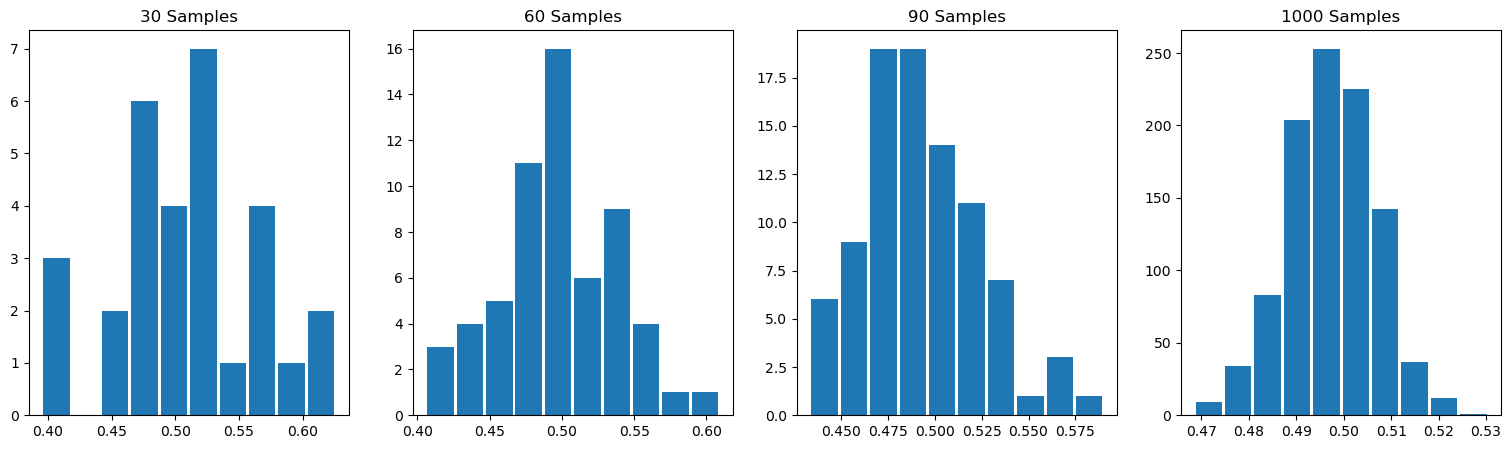


  30 samples - mean 0.5075710191065749
  30 samples - sterror 0.05767392961762678
  30 samples - skew 0.01583395130833216
  30 samples - kurt -0.19410127893597062


  60 samples - mean 0.497333850348552
  60 samples - sterror 0.04144831006710345
  60 samples - skew -0.020288180406922835
  60 samples - kurt 0.06944104619808611


  90 samples - mean 0.4932188009359341
  90 samples - sterror 0.031812441205368795
  90 samples - skew 0.3917872026317005
  90 samples - kurt 0.0355024934297532


  1000 samples - mean 0.4973105242658368
  1000 samples - sterror 0.009274463829603175
  1000 samples - skew -0.08513862490292798
  1000 samples - kurt 0.09163641756611529



In [89]:
# Central limit theorem modifying the size of the samples.
# By modifying the size of the samples everything changes, making the distribution normal much earlier and making the standard deviation much smaller.
# This being the proper way to realize the central limit theorem.

clt1= get_sample(uDist, 30, 30)
clt2= get_sample(uDist, 60, 60)
clt3= get_sample(uDist, 90, 90)
clt4= get_sample(uDist, 1000, 1000)

fig, ax = plt.subplots(1, 4, figsize= (19, 5))

ax[0].hist(clt1, rwidth= 0.9)
ax[0].set_title('30 Samples')
ax[1].hist(clt2, rwidth= 0.9)
ax[1].set_title('60 Samples')
ax[2].hist(clt3, rwidth= 0.9)
ax[2].set_title('90 Samples')
ax[3].hist(clt4, rwidth= 0.9)
ax[3].set_title('1000 Samples')
plt.show()

stats(clt1, clt2, clt3, clt4)

### Standard error
Once the standard deviation of the samples has been observed, it is possible to mention the standard error, which is the standard deviation of the aforementioned samples.

#### Getting the standard error mathematically
It is possible to obtain the standard error mathematically using the following formula:
$$\text{Standard error} = \frac{\text{Std}} {\sqrt{n}}$$
Here:

Standard error = Standard deviation of the adapted sample.

Population std = The standard deviation.

n = Sample size.

When making the comparison with the data above they are similar, but not the same because the data above was obtained randomly but they are quite similar.

In [90]:
import numpy as np

st = np.std(uDist)
sterror30 = st / np.sqrt(30)
sterror60 = st / np.sqrt(60)
sterror90 = st / np.sqrt(90)
sterror1000 = st / np.sqrt(1000)

print("Standard error:", sterror30, sterror60, sterror90, sterror1000)

Standard error: 0.05294464943746976 0.03743752064477939 0.030567607604873533 0.00917028228146206


#### Obtaining the standard deviation mathematically
Once we obtain the standard error, it is possible to reverse the process, using the following formula:
$$\text{Standard dev} = Standard error \cdot{\sqrt{n}}$$
Where:

Standard Dev = Standard deviation of the population.

Standard error = Standard error.

n = Sample size.

In [91]:
import numpy as np

st = np.std(uDist)
sterror30 = st / np.sqrt(30)
stdev30 = sterror30 * np.sqrt(30)
sterror60 = st / np.sqrt(60)
stdev60 = sterror60 * np.sqrt(60)
sterror90 = st / np.sqrt(90)
stdev90 = sterror90 * np.sqrt(90)
sterror1000 = st / np.sqrt(1000)
stdev1000 = sterror1000 * np.sqrt(1000)

print('Standard deviation poblacion:', st)
print('Standard deviation calculada:', stdev30, stdev60, stdev90, stdev1000)

Standard deviation poblacion: 0.2899897879610539
Standard deviation calculada: 0.2899897879610539 0.2899897879610539 0.2899897879610539 0.2899897879610539


# Confidence Intervals

## Intervals
Intervals are grouped data of even proportions, which cover a percentage of the data.

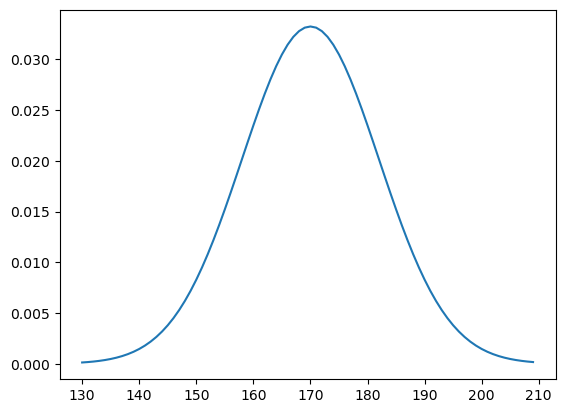

In [92]:
import scipy as sp
import numpy as np

mu = 170
sigma = 12
normal = sp.stats.norm(mu, sigma)

x = range(130, 210, 1)

plt.plot(x, normal.pdf(x))
plt.show()

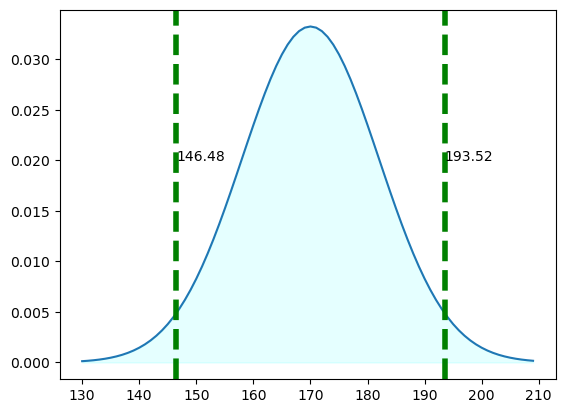

In [93]:
# Interval
# Here you can see how a 95% interval is generated symmetrically.

plt.plot(x, normal.pdf(x))
plt.axvline(interval[0], linestyle='--', color= 'g', linewidth= 4)
plt.axvline(interval[1], linestyle='--', color= 'g', linewidth= 4)
plt.text(interval[0], 0.02, round(interval[0], 2))
plt.text(interval[1], 0.02, round(interval[1], 2))
plt.fill_between(x, normal.pdf(x), color= 'cyan', alpha= 0.1)
plt.show()

## Confidence intervals
Confidence intervals are intervals within which it can be inferred that the mean of the entire population is found, **this in case of using the normal distribution without having the entire population**.

### For numeric data
Using numerical data, the formula to find these intervals is as follows:
$$error = (z\cdot{\frac{\text{standard deviation}}{\sqrt{\text{Sample size}}}})$$

$$\text{Low interval}= \text{sample mean} - error$$

$$\text{High Interval}= \text{sample mean} + error$$

In [94]:
# Defining z
# To define the z value it is necessary to process that what is desired is to take two symmetrical sides within the distribution, each side equal to half of the remaining error, so that if it is 95% the error is 5% This must be split in half with 2.5% on each side.
v = 0.95 

z = sp.stats.norm.ppf(v)

# The error here is 5%
print('z with 5%:', z)

v = 0.95/2 + 0.5

print('Value with transformation:', v)

z = sp.stats.norm.ppf(v)

# The error here is 2.5%
print('z with 2.5%', z)

z with 5%: 1.6448536269514722
Value with transformation: 0.975
z with 2.5% 1.959963984540054


In [95]:
import math

mean = normal.mean()
st = normal.std()
z = sp.stats.norm.ppf(0.95/2+0.5)

error = z * (st/math.sqrt(80))

print('z:', z)

low = mean - error
high = mean + error

print('lower:', low, 'higher:', high)

z: 1.959963984540054
lower: 167.37043237827027 higher: 172.62956762172973


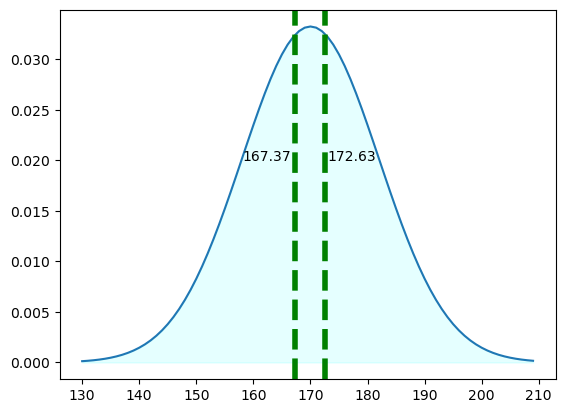

In [96]:
# Confidence interval
# It can be inferred that the mean of the entire population is in this range.

plt.plot(x, normal.pdf(x))
plt.axvline(low, linestyle='--', color= 'g', linewidth= 4)
plt.axvline(high, linestyle='--', color= 'g', linewidth= 4)
plt.text(158, 0.02, round(low, 2))
plt.text(173, 0.02, round(high, 2))
plt.fill_between(x, normal.pdf(x), color= 'cyan', alpha= 0.1)
plt.show()

### For categorical data
To work with categorical data it is necessary to use proportions instead of numerical values. In this case the function to find the intervals is different:

$$error = z\cdot{\sqrt{\frac{\hat{p}\cdot{\hat{q}}}{n}}}$$

$$\text{Low Interval}= \hat{p} - error$$

$$\text{Interval high}= \hat{p} + error$$

# Hypothesis tests
The empirical tests of hypotheses are carried out in order to know if one distribution is different from another, using an estimated level of confidence, for this two types of hypotheses are used, the null hypothesis $H_0$ and the alternate hypothesis. $H_A$.

$H_0(\text{Null Hypothesis})$ | $H_A(\text{Alternate Hypothesis})$
--- | ---
There is no change | There is a probable change
It is the opposite of what is sought to prove | It is what you want to prove
This cannot be accepted, it can only be rejected | In this case, the null hypothesis is rejected.

In this way, to carry out a hypothesis test, it is necessary to use the so-called p-values.

## p-values
The p values refer to a percentage within a sample, such that a p value of 0.95 means 95% within a sample, in other words there is a 95% probability of finding a value within the distribution, This p-value could be understood as the result of CDF in scipy.

## Queues
Hypothesis tests can be in different ways depending on what you want to look for, these can be one-sided or two-sided, but within the one-sided tests, they can be one-sided or one-sided. minor.

|One-tailed(minor)|One-tailed(major)|Two-tailed|
|---|---|---|
|To determine if the distribution is smaller|To determine if the distribution is larger|To determine if the distribution is different|
|<|>|!=

## Analysis
In order to carry out the hypothesis tests it is necessary to carry out an analysis using a specific language, which is:

- Only the null hypothesis can be rejected or failed to reject.
- **The null hypothesis is accepted.**
- **Failed to reject the null hypothesis.**

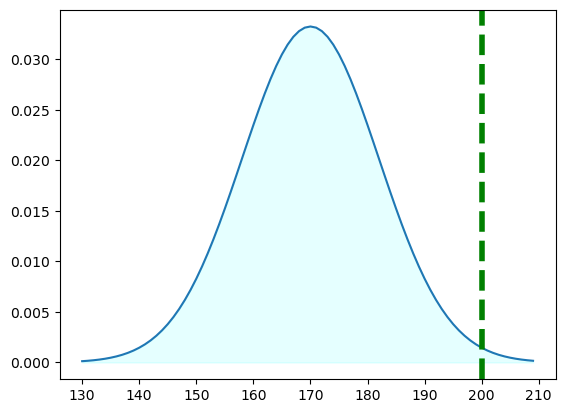

In [97]:
# A long side(A tail)
# Assuming that the larger tail has a 95% confidence interval and that 95% is at 200.

plt.plot(x, normal.pdf(x))
plt.axvline(200, linestyle='--', color= 'g', linewidth= 4)
plt.fill_between(x, normal.pdf(x), color= 'cyan', alpha= 0.1)
plt.show()

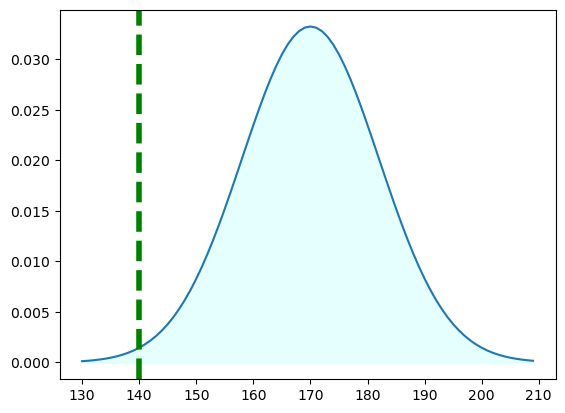

In [98]:
# A minor side(A tail)
# Assuming that the minor tail has a 95% confidence interval and assuming that this 95% is at 140.

plt.plot(x, normal.pdf(x))
plt.axvline(140, linestyle='--', color= 'g', linewidth= 4)
plt.fill_between(x, normal.pdf(x), color= 'cyan', alpha= 0.1)
plt.show()

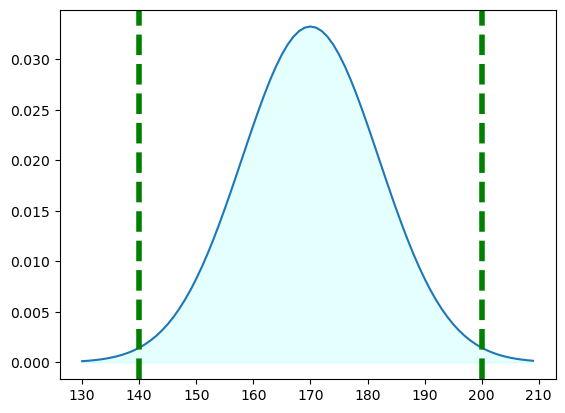

In [99]:
# two tails
# Assuming that the two previous cases are given then you can have a figure like the following.

plt.plot(x, normal.pdf(x))
plt.axvline(140, linestyle='--', color= 'g', linewidth= 4)
plt.axvline(200, linestyle='--', color= 'g', linewidth= 4)
plt.fill_between(x, normal.pdf(x), color= 'cyan', alpha= 0.1)
plt.show()

## Using z-score

There are two ways to do hypothesis tests, one is using z values, which is the classical way and the other is the visual way, these hypothesis tests will be seen in greater depth in t-student.

### For numeric data
For numerical data, the z values have the following formula:
$$z = \frac{x-\hat{x}}{s}$$
Being:

x = The numerical values.

$\hat{x}$ = Sample mean.

s = Standard deviation.

### For categorical data
In the same way, for categorical variables, the z-values can be found using the following formula:
$$z = \frac{\hat{p}-p_0}{sd}$$

Being:

$\hat{p}$ = Probability of success (in case of tossing a coin there are false and positives so that the probability of success could be the probability of getting heads, in other words... $\text{probability of success}/\text{Total number of items}$).

$p_0$ = Probability of failure (This is the complement of the probability of success so it is 1 - p-success)

sd = proportional standard deviation.

**It should be noted that using a normal distribution for hypothesis testing on categorical data is not recommended because the result is very imprecise.**

Basically, the z values work as values adapted from the sample to a normal distribution. Graphically, we can imagine that we transform the data to a normal distribution using the z values. This is necessary in case you want to do the process by hand since packages like scipy adapt the data without the need to use z-values.

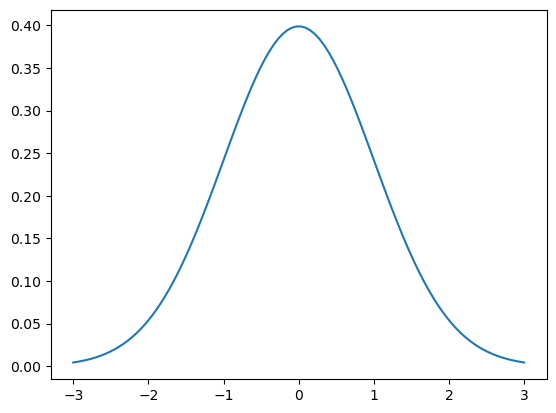

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

mu = 0
variance = 1
sigma = np.sqrt(variance)

low_interval = mu - 3*sigma
high_interval = mu + 3*sigma

x = np.linspace(low_interval, high_interval, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Here we will give an example using data that will later be used in the t distribution, something important is that this sample in a normal scenario is very small for a normal distribution but it is useful for a simple example.

```
sample = [321, 295, 332, 351, 281, 336, 311, 253, 270, 326, 311, 288]
```
Being the numerical data we will use the formula for numerical data. and we will put the data that we want to find at 300 so that we want to know if we have enough statistical evidence to know that our distribution is different from another with a mean of 300, with a confidence level of 95%.

In [101]:
sample = [321, 295, 332, 351, 281, 336, 311, 253, 270, 326, 311, 288]

In [102]:
x = 300
x_hat = np.mean(sample)

# The standard deviation must have one degree of freedom since it is a sample.
# For more information look in the numpy documentation.

s = np.std(sample, ddof=1)

z = (x - x_hat) / s
z

-0.2132331443573995

The probability of obtaining z in a normal distribution is more than 41% so that within a 95% confidence level the samples are equal.

In [103]:
stats.norm.cdf(z)

0.41557255861812015

Graphically it is possible to see where the adapted z value of 300 lies.

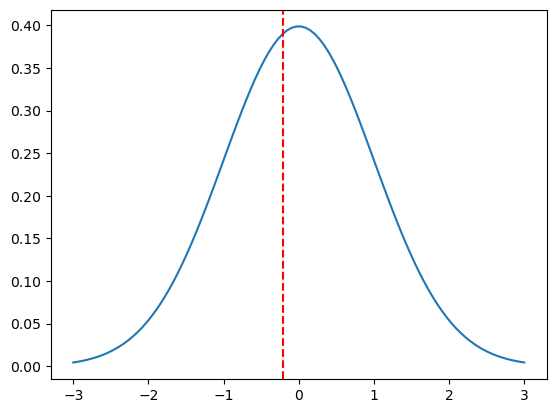

In [104]:
mu = 0
variance = 1
sigma = np.sqrt(variance)

low_interval = mu - 3*sigma
high_interval = mu + 3*sigma

x = np.linspace(low_interval, high_interval, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(z, color='red', ls='--')
plt.show()

Graphically the barrier of 95% (lower 5%) is well below. Thus, the null hypothesis is failed to be rejected.

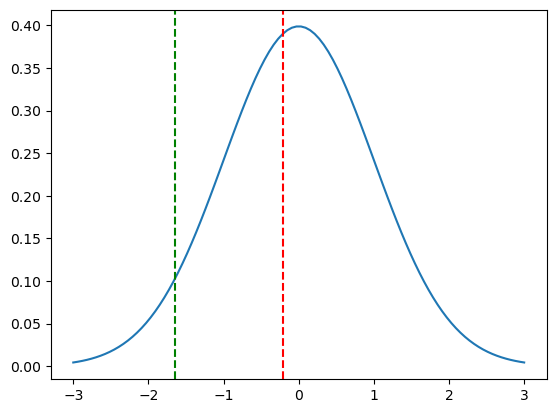

In [105]:
mu = 0
variance = 1
sigma = np.sqrt(variance)

low_interval = mu - 3*sigma
high_interval = mu + 3*sigma

x = np.linspace(low_interval, high_interval, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(z, color='red', ls='--')
plt.axvline(stats.norm.ppf(1 - 0.95), color='green', ls='--')
plt.show()

It is possible to do the same analysis for categorical data using z values for categorical data.

## Using graph
Suppose we generate a random normal distribution on which we will perform hypothesis tests. Something important is that the hypothesis tests will be done intuitively in order to explain the logic behind the hypothesis tests and using the adaptation made by the python scipy package.

In [106]:
# Random data
import scipy as sp

normal = sp.stats.norm()
data = normal.rvs(30000, random_state=87)
mean = data.mean()
sd = data.std()

print('mean:', mean, 'sd:', sd)

mean: -0.0003097185943495122 sd: 0.9989757785955251


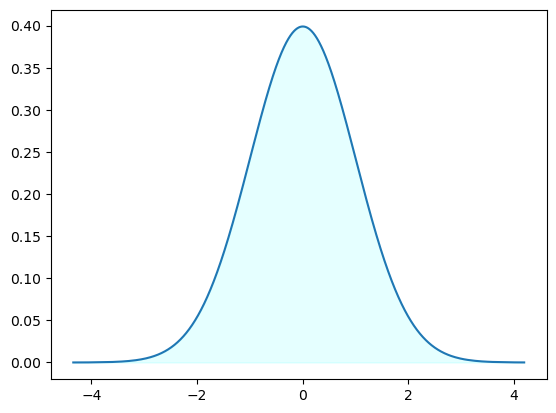

In [107]:
# Shape of the distribution

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

s_data = sorted(data)

ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
plt.show()

higher: 1.6448536269514722 lower: -1.6448536269514722 two_tail: (1.959963984540054, -1.959963984540054)


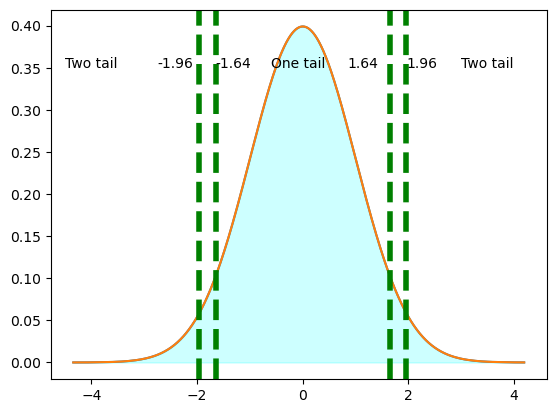

In [108]:
# Intervals graphically
higher = normal.ppf(0.95)
lower = normal.ppf(0.95) * -1
# To carry out a two-tailed analysis, it must be taken into account that the remaining 5% must be distributed in both tails.
# So that only 2.5% will be kept in each queue, the complement is 97.5%.
two_tail = (normal.ppf(0.975), normal.ppf(0.975) * -1)

print('higher:', higher, 'lower:', lower, 'two_tail:', two_tail)

fig, ax = plt.subplots()

s_data = sorted(data)

ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.axvline(lower, linestyle='--', color= 'g', linewidth= 4)
ax.axvline(higher, linestyle='--', color= 'g', linewidth= 4)
ax.axvline(two_tail[0], linestyle='--', color= 'g', linewidth= 4)
ax.axvline(two_tail[1], linestyle='--', color= 'g', linewidth= 4)
plt.text(lower, 0.35, round(lower, 2))
plt.text(higher-0.8, 0.35, round(higher, 2))
plt.text(-0.6, 0.35, 'One tail')
plt.text(two_tail[0], 0.35, round(two_tail[0], 2))
plt.text(two_tail[1]-0.8, 0.35, round(two_tail[1], 2))
plt.text(-4.5, 0.35, 'Two tail')
plt.text(3, 0.35, 'Two tail')
plt.show()

In [109]:
# Another way to obtain the two-tailed test is by using the interval function.

normal.interval(0.95)

(-1.959963984540054, 1.959963984540054)

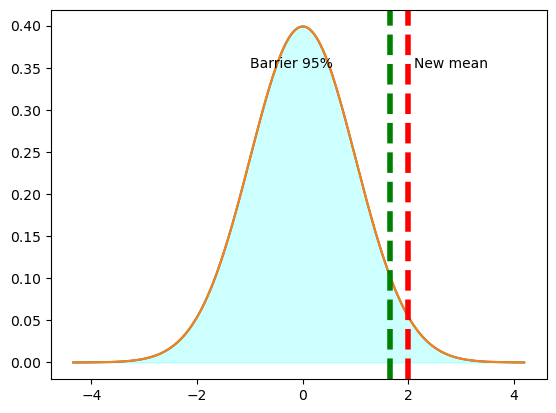

In [110]:
# Upper tail analysis
# Assuming that you have a separate sample and you want to prove that it is different from the previously shown distribution.
# Let's assume that the mean of this new sample is 2.
# Here the new mean goes beyond the 95% barrier, which means that the null hypothesis can be rejected and affirm that the new sample is different.

fig, ax = plt.subplots()

ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.axvline(higher, linestyle='--', color= 'g', linewidth= 4)
plt.text(-1, 0.35, 'Barrier 95%')
ax.axvline(2, linestyle='--', color= 'r', linewidth= 4)
plt.text(2.1, 0.35, 'New mean')
plt.show()

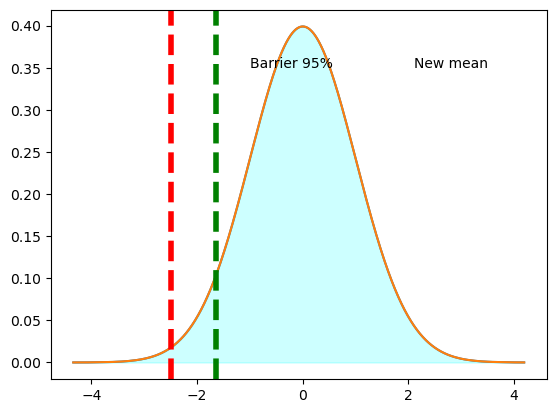

In [111]:
# Analysis of a lower tail
# Assuming that you have a separate sample and you want to prove that it is different from the previously shown distribution.
# Let's assume that the mean of this new sample is -2.5.
# Here the new mean goes beyond the barrier of 5% or complement of 95%, which means that the null hypothesis can be rejected and affirm that the new sample is different.

fig, ax = plt.subplots()

ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.axvline(lower, linestyle='--', color= 'g', linewidth= 4)
plt.text(-1, 0.35, 'Barrier 95%')
ax.axvline(-2.5, linestyle='--', color= 'r', linewidth= 4)
plt.text(2.1, 0.35, 'New mean')
plt.show()

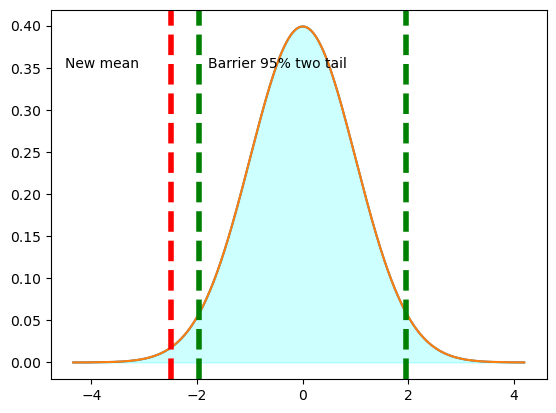

In [112]:
# Two-tailed analysis
# Assuming that in this case the mean of the new sample is -2.5, it is possible to show that it is different, this because it is smaller.
# In this way it is possible to reject the null hypothesis and accept that the second sample is different.

fig, ax = plt.subplots()

ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.plot(s_data, normal.pdf(s_data))
ax.fill_between(s_data, normal.pdf(s_data), color= 'cyan', alpha= 0.1)
ax.axvline(two_tail[0], linestyle='--', color= 'g', linewidth= 4)
ax.axvline(two_tail[1], linestyle='--', color= 'g', linewidth= 4)
ax.axvline(-2.5, linestyle='--', color= 'r', linewidth= 4)
plt.text(-1.8, 0.35, 'Barrier 95% two tail')
plt.text(-4.5, 0.35, 'New mean')
plt.show()

## Errors doing hypothesis tests

### Error type 1

It occurs when the null hypothesis is rejected incorrectly.

### Error type 2

It occurs when the null hypothesis is accepted incorrectly.

## Conclusion
As a conclusion, assuming that the data used in the last two examples were obtained from the treatment of patients with hypertension with drug A, and the new samples were from the same patients with drug B, it is possible to admit that there is a difference between the patients treated with both medications and their recovery times.

---

Here it should be noted that in the case of a lower tail we could say that there were patients who were cured in less time with drug B and that it can be proven that there is a difference between the two drugs.

In the two-tailed case it is possible to prove that there is a difference, so in this case it can be said that there was a difference and that drug B works faster than drug A.

Both look the same but it should be noted that in one-tailed tests the serious question is: **Does drug B have a faster action than drug A?**. While in two-tailed tests the serious question is "Is there a difference in reaction time between both drugs A and B?**

In both cases, the null hypothesis is rejected.